In [1]:
import numpy as np 
import matplotlib.pylab as plt 
from gaussian_beam_funcs import *

from astropy import units as u

In [2]:
#Gaussian beam paramters d1, d2, t (semi-major (deg), semi-minor (deg), theta(deg))
#theta is a PA measure from y(north) to -x(east). So we add 90°, because the definition of gaussian function
#These values are from image header

beam_parm_deg = np.array([8.548904313809e-6, 6.518279616204e-6, 
                              90+1.545404720306e1])*u.deg #Parameters for Gaussian beam fitted to PSF

beam_parm_rad = (beam_parm_deg).to(u.rad) #Values in rad, requerid for calculation

A_psf = 1     #Amplitude of Gaussian beam fitted to PSF

In [3]:
#Generate xy coordinate grid
scale = 0.005 #[arcsec] from image header
Npix = 23
pix = scale*np.pi/(180*3600) #length of a pixal
fs = 1/pix
max_val = ((Npix-1)*0.05*np.pi/(180*3600))/2
x_vals = np.arange(-11,12)*pix
y_vals = np.arange(-11,12)*pix
X_vals = np.array([x_vals,]*(Npix))
Y_vals = (np.array([y_vals,]*(Npix))).T

In [4]:
X_vals = np.array([x_vals,]*(Npix))
X_vals.shape

(23, 23)

In [5]:
Y_vals.shape

(23, 23)

In [6]:
#Generate beams
B_psf = gauss_beam_ddt(A_psf,beam_parm_rad.value,X_vals,Y_vals)

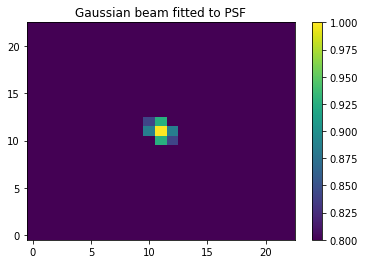

In [7]:
plt.title("Gaussian beam fitted to PSF")
plt.imshow(B_psf,aspect="auto", vmin=0.8, origin="lower")
plt.colorbar()

In [8]:
from astropy.io import fits

fits.writeto(filename="/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/ALMA/Data/alma_psf.fits", data=B_psf, overwrite=True)

Now we need to rotate the PSF, because we need the gravitational arcs semi major axis along the x-axis.
The PA angle of the galaxy was finded my find_my_galaxy. Its value are:

$PA = 11.6°$

In [9]:
from mpdaf.obj import Image
PA = 11.6

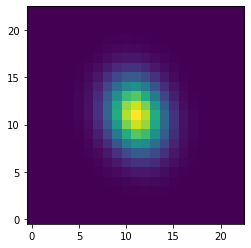

In [10]:
psf = Image("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/ALMA/Data/alma_psf.fits")
psf.plot()

In [11]:
np.where(psf.data.data == psf.data.data.max())

(array([11]), array([11]))

[INFO] 23 x 23 Image (/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/ALMA/Data/alma_psf.fits)
[INFO] .data(23 x 23) (no unit), no noise
[INFO] spatial coord (): min:(-1.0,20.6) max:(25.0,3.4) step:(1.0,1.0) rot:78.4 deg


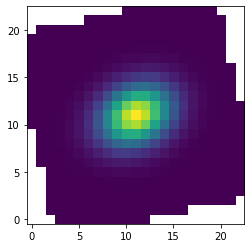

In [12]:
#We fix the center in (11,11)px.
rot = psf.rotate(90-PA,pivot=np.array([11,11]), interp="split",reshape=False)
rot.plot()
rot.info()

Some check in the flux after interpolation

In [13]:
psf.data.data.sum()

32.731794621340384

In [14]:
rot.data.data.sum()

32.75030343717937

In [16]:
print("Max value", rot.data.data.max()) #Max value
print("Position of Max value", np.where(rot.data.data == rot.data.data.max()))

Max value 1.0
Position of Max value (array([11]), array([11]))


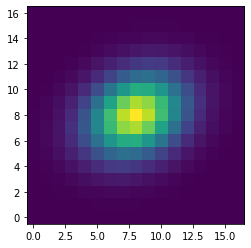

In [17]:
cut_rot = rot.subimage(center=(11,11), size=17, unit_center=None, unit_size=None)
cut_rot.plot()

In [19]:
print("Total Flux", cut_rot.data.data.sum())
print("Max Value", cut_rot.data.data.max())
print("Position of Max Value", np.where(cut_rot.data.data == cut_rot.data.data.max()))

Total Flux 32.724915645332615
Max Value 1.0
Position of Max Value (array([8]), array([8]))


In [20]:
cut_rot.write("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/ALMA/Data/Alma_psf_rot.fits")